In [8]:
import matplotlib.pyplot as plt

In [9]:
def place_bins(container_width, container_height, bins):
    placed_bins = {}
    unplaced_bins = []
    current_x, current_y = 0, 0   # start at bottom-left
    row_height = 0

    for bin_id, (width, height) in bins.items():
        # Check if bin fits in current row
        if current_x + width <= container_width and current_y + height <= container_height:
            placed_bins[bin_id] = (current_x, current_y, width, height)
            current_x += width
            if height > row_height:
                row_height = height
        else:
            # Move to next row (bottom → top)
            current_x = 0
            current_y += row_height
            row_height = height
            if current_y + height <= container_height and width <= container_width:
                placed_bins[bin_id] = (current_x, current_y, width, height)
                current_x += width
            else:
                unplaced_bins.append(bin_id)

    return placed_bins, unplaced_bins

In [10]:
def visualize_bins(container_width, container_height, placed_bins):
    fig, ax = plt.subplots()
    # Draw container outline
    ax.add_patch(plt.Rectangle((0, 0), container_width, container_height, fill=None, edgecolor='blue', linewidth=2))

    # Assign row-wise colors
    row_colors = {}
    color_palette = [
        "lightblue", "lightgreen", "lightcoral", "khaki", "plum",
        "gold", "lightsalmon", "turquoise", "orchid"
    ]

    for bin_id, (x, y, width, height) in placed_bins.items():
        # Use row's y as key for color assignment
        if y not in row_colors:
            row_colors[y] = color_palette[len(row_colors) % len(color_palette)]
        color = row_colors[y]

        # Draw bin with row color
        ax.add_patch(plt.Rectangle((x, y), width, height, facecolor=color, edgecolor="black"))
        ax.text(x + width/2, y + height/2, str(bin_id), ha='center', va='center', fontsize=10, color='black')

    ax.set_xlim(0, container_width)
    ax.set_ylim(0, container_height)
    ax.set_aspect('equal')
    plt.title("Container with Placed Bins")
    plt.show()

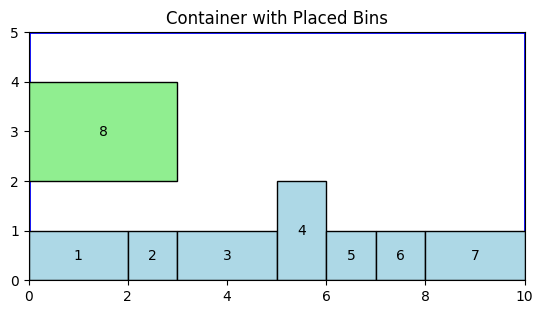

Placed bin IDs: [1, 2, 3, 4, 5, 6, 7, 8]
Unplaced bin IDs: []


In [11]:
# Example usage
if __name__ == "__main__":
    # Container dimensions
    W, H = 10, 5

    # Bin data (width, height) with unique IDs
    bins = {
        1: (2, 1),
        2: (1, 1),
        3: (2, 1),
        4: (1, 2),
        5: (1, 1),
        6: (1, 1),
        7: (2, 1),
        8: (3, 2)
    }

    placed, unplaced = place_bins(W, H, bins)
    visualize_bins(W, H, placed)

    print("Placed bin IDs:", list(placed.keys()))
    print("Unplaced bin IDs:", unplaced)